## Lead Scoring Case Study


### Step 1: Importing and Merging Data

In [5]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [7]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Step 2: Inspecting the Dataframe

In [8]:
# Let's see the head of our master dataset
lead_data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [9]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

#### Removing varaibles which has no use

In [9]:
lead_data = lead_data.drop(['Prospect ID','Lead Number'], axis=1)
lead_data.shape

(9240, 35)

#### Converting all binary variables (Yes/No) to 0/1

In [11]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [12]:
lead_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Get updates on DM Content  \
0  Page Visited on Website     NaN  ...                         0   
1             Email Opened   India  ...                         0   
2             Email Opened   India  ...                         0   
3              Unreachable   India  ...                         0   
4        Converted to Lead   India  ...                         0   

     Lead Profile    City Asymmetrique Activity Index  \
0          Select  Select                   02.Medium   
1          Select  Select                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   
3          Select  Mumbai                   02.Medium   
4          Select  Mumbai                   02.Medium   

   Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                   02.Medium                         15.0   
1                   02.Medium                         15.0   
2                     01.High                         14.0   
3                     01.High                         13.0   
4                     01.High                         15.0   

   Asymmetrique Profile Score  I agree to pay the amount through cheque  \
0                        15.0                                         0   
1                        15.0                                         0   
2                        20.0                                         0   
3                        17.0                                         0   
4                        18.0                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 35 columns]

#### Check value count for each categorical variables

In [23]:
lead_data['Lead Origin'].value_counts()

#Lead Origin Class is equally balanced






Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [24]:
lead_data['Lead Source'].value_counts()

values_list_to_others = ['bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM']
for col in values_list_to_others:
   lead_data['Lead Source'] = np.where(lead_data['Lead Source'] == col, 'others', lead_data['Lead Source'])

lead_data['Lead Source'].value_counts()


Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
others                28
Name: Lead Source, dtype: int64

In [25]:
lead_data['Last Activity'].value_counts()
values_list_to_others = ['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow',
'Resubscribed to emails']
for col in values_list_to_others:
   lead_data['Last Activity'] = np.where(lead_data['Last Activity'] == col, 'others', lead_data['Last Activity'])
lead_data['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
others                         21
Name: Last Activity, dtype: int64

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [28]:
lead_data['Country'].value_counts()

## value count of all other countries are way low then India so converted all other countries as others to reduce complexity.

for col in values_list_to_others:
   lead_data['Country'] = np.where(lead_data['Country'] != 'India', 'others', lead_data['Country'])
lead_data['Country'].value_counts()

India     6492
others    2748
Name: Country, dtype: int64

In [30]:

lead_data['Specialization'].value_counts()
# well balanced class so no changes required

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
lead_data['What matters most to you in choosing a course'].value_counts()
lead_data = lead_data.drop(['What matters most to you in choosing a course'], axis=1)
lead_data.shape

# Drop this column as this will not add any value

(9240, 34)

In [35]:
lead_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [36]:
lead_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [37]:
lead_data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [38]:
lead_data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [39]:
lead_data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [42]:
lead_data['Last Notable Activity'].value_counts()

values_list_to_others = ['Email Marked Spam ','Approached upfront','Resubscribed to emails','View in browser link Clicked',
'Form Submitted on Website','Email Received','Email Marked Spam']
for col in values_list_to_others:
   lead_data['Last Notable Activity'] = np.where(lead_data['Last Notable Activity'] == col, 'others', lead_data['Last Notable Activity'])
lead_data['Last Notable Activity'].value_counts()

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
others                         7
Name: Last Notable Activity, dtype: int64

In [43]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
'How did you hear about X Education','What is your current occupation','Lead Quality','Lead Profile','City',
'Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

#### Drop Categorical values which convetred into dummies

In [45]:

lead_data.shape
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
'How did you hear about X Education','What is your current occupation','Lead Quality','Lead Profile','City',
'Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], axis=1)
lead_data.shape


(9240, 106)

In [46]:
lead_data.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  ...  \
0                  0                   0  ...   
1                  0                   0  ...   
2                  0                   0  ...   
3                  0                   0  ...   
4                  0                   0  ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  Last Notable Activity_others  
0                                   0                             0  
1                                   0                             0  
2                                   0                             0  
3                                   0                             0  
4                                   0                             0  

[5 rows x 106 columns]

In [47]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 106 entries, Do Not Email to Last Notable Activity_others
dtypes: float64(4), int64(16), object(1), uint8(85)
memory usage: 2.2+ MB


Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [48]:
# Checking for outliers in the continuous variables
num_lead_data = lead_data[['Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [49]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Total Time Spent on Website  Page Views Per Visit  \
count                  9240.000000           9103.000000   
mean                    487.698268              2.362820   
std                     548.021466              2.161418   
min                       0.000000              0.000000   
25%                      12.000000              1.000000   
50%                     248.000000              2.000000   
75%                     936.000000              3.000000   
90%                    1380.000000              5.000000   
95%                    1562.000000              6.000000   
99%                    1840.610000              9.000000   
max                    2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
90%                      16.000000                   19.000000  
95%                      17.000000                   20.000000  
99%                      17.000000                   20.000000  
max                      18.000000                   20.000000

<AxesSubplot: >

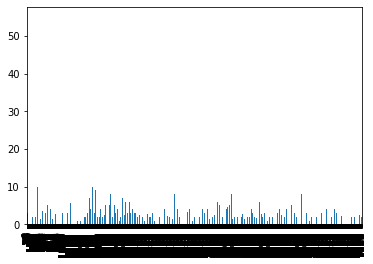

In [56]:
lead_data['Page Views Per Visit'].plot.bar()

From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [117]:
# Adding up the missing values (column-wise)
lead_data.isnull().sum()
lead_data['TotalVisits']=lead_data['TotalVisits'].fillna(0)

lead_data['Asymmetrique Activity Score']=lead_data['Asymmetrique Activity Score'].fillna(lead_data['Asymmetrique Activity Score'].mean())
lead_data['Asymmetrique Profile Score']=lead_data['Asymmetrique Profile Score'].fillna(lead_data['Asymmetrique Profile Score'].mean())

lead_data['Page Views Per Visit']=lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].mean())

lead_data.isnull().sum()

Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
                                                ..
Last Notable Activity_Page Visited on Website    0
Last Notable Activity_SMS Sent                   0
Last Notable Activity_Unreachable                0
Last Notable Activity_Unsubscribed               0
Last Notable Activity_others                     0
Length: 106, dtype: int64

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [118]:
# Checking percentage of missing values after removing the missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
                                                ... 
Last Notable Activity_Page Visited on Website    0.0
Last Notable Activity_SMS Sent                   0.0
Last Notable Activity_Unreachable                0.0
Last Notable Activity_Unsubscribed               0.0
Last Notable Activity_others                     0.0
Length: 106, dtype: float64

Now we don't have any missing values

### Step 4: Test-Train Split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  ...  \
0                   0          0  ...   
1                   0          0  ...   
2                   0          0  ...   
3                   0          0  ...   
4                   0          0  ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  Last Notable Activity_others  
0                                   0                             0  
1                                   0                             0  
2                                   0                             0  
3                                   0                             0  
4                                   0                             0  

[5 rows x 105 columns]

In [121]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0          0.0                    -0.885371   
6795             0            0          4.0                     0.005716   
3516             0            0          5.0                    -0.691418   
8105             0            0          5.0                     1.365219   
3934             0            0          0.0                    -0.885371   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1871             -1.088305       0         0                  0   
6795             -0.473232       0         0                  0   
3516              0.067847       0         0                  0   
8105              1.223999       0         0                  0   
3934             -1.088305       0         0                  0   

      X Education Forums  Newspaper  ...  \
1871                   0          0  ...   
6795                   0          0  ...   
3516                   0          0  ...   
8105                   0          0  ...   
3934                   0          0  ...   

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  \
1871                                   1   
6795                                   1   
3516                                   1   
8105                                   0   
3934                                   0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

     Last Notable Activity_Modified  \
1871                              0   
6795                              0   
3516                              0   
8105                              0   
3934                              1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  Last Notable Activity_others  
1871                                   0                             0  
6795                                   0                             0  
3516                                   0                             0  
8105                                   0                             0  
3934                                   0                             0  

[5 rows x 105 columns]

In [125]:
### Checking the converted Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

We have almost 38% converted rate

### Step 6: Looking at Correlations

In [126]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

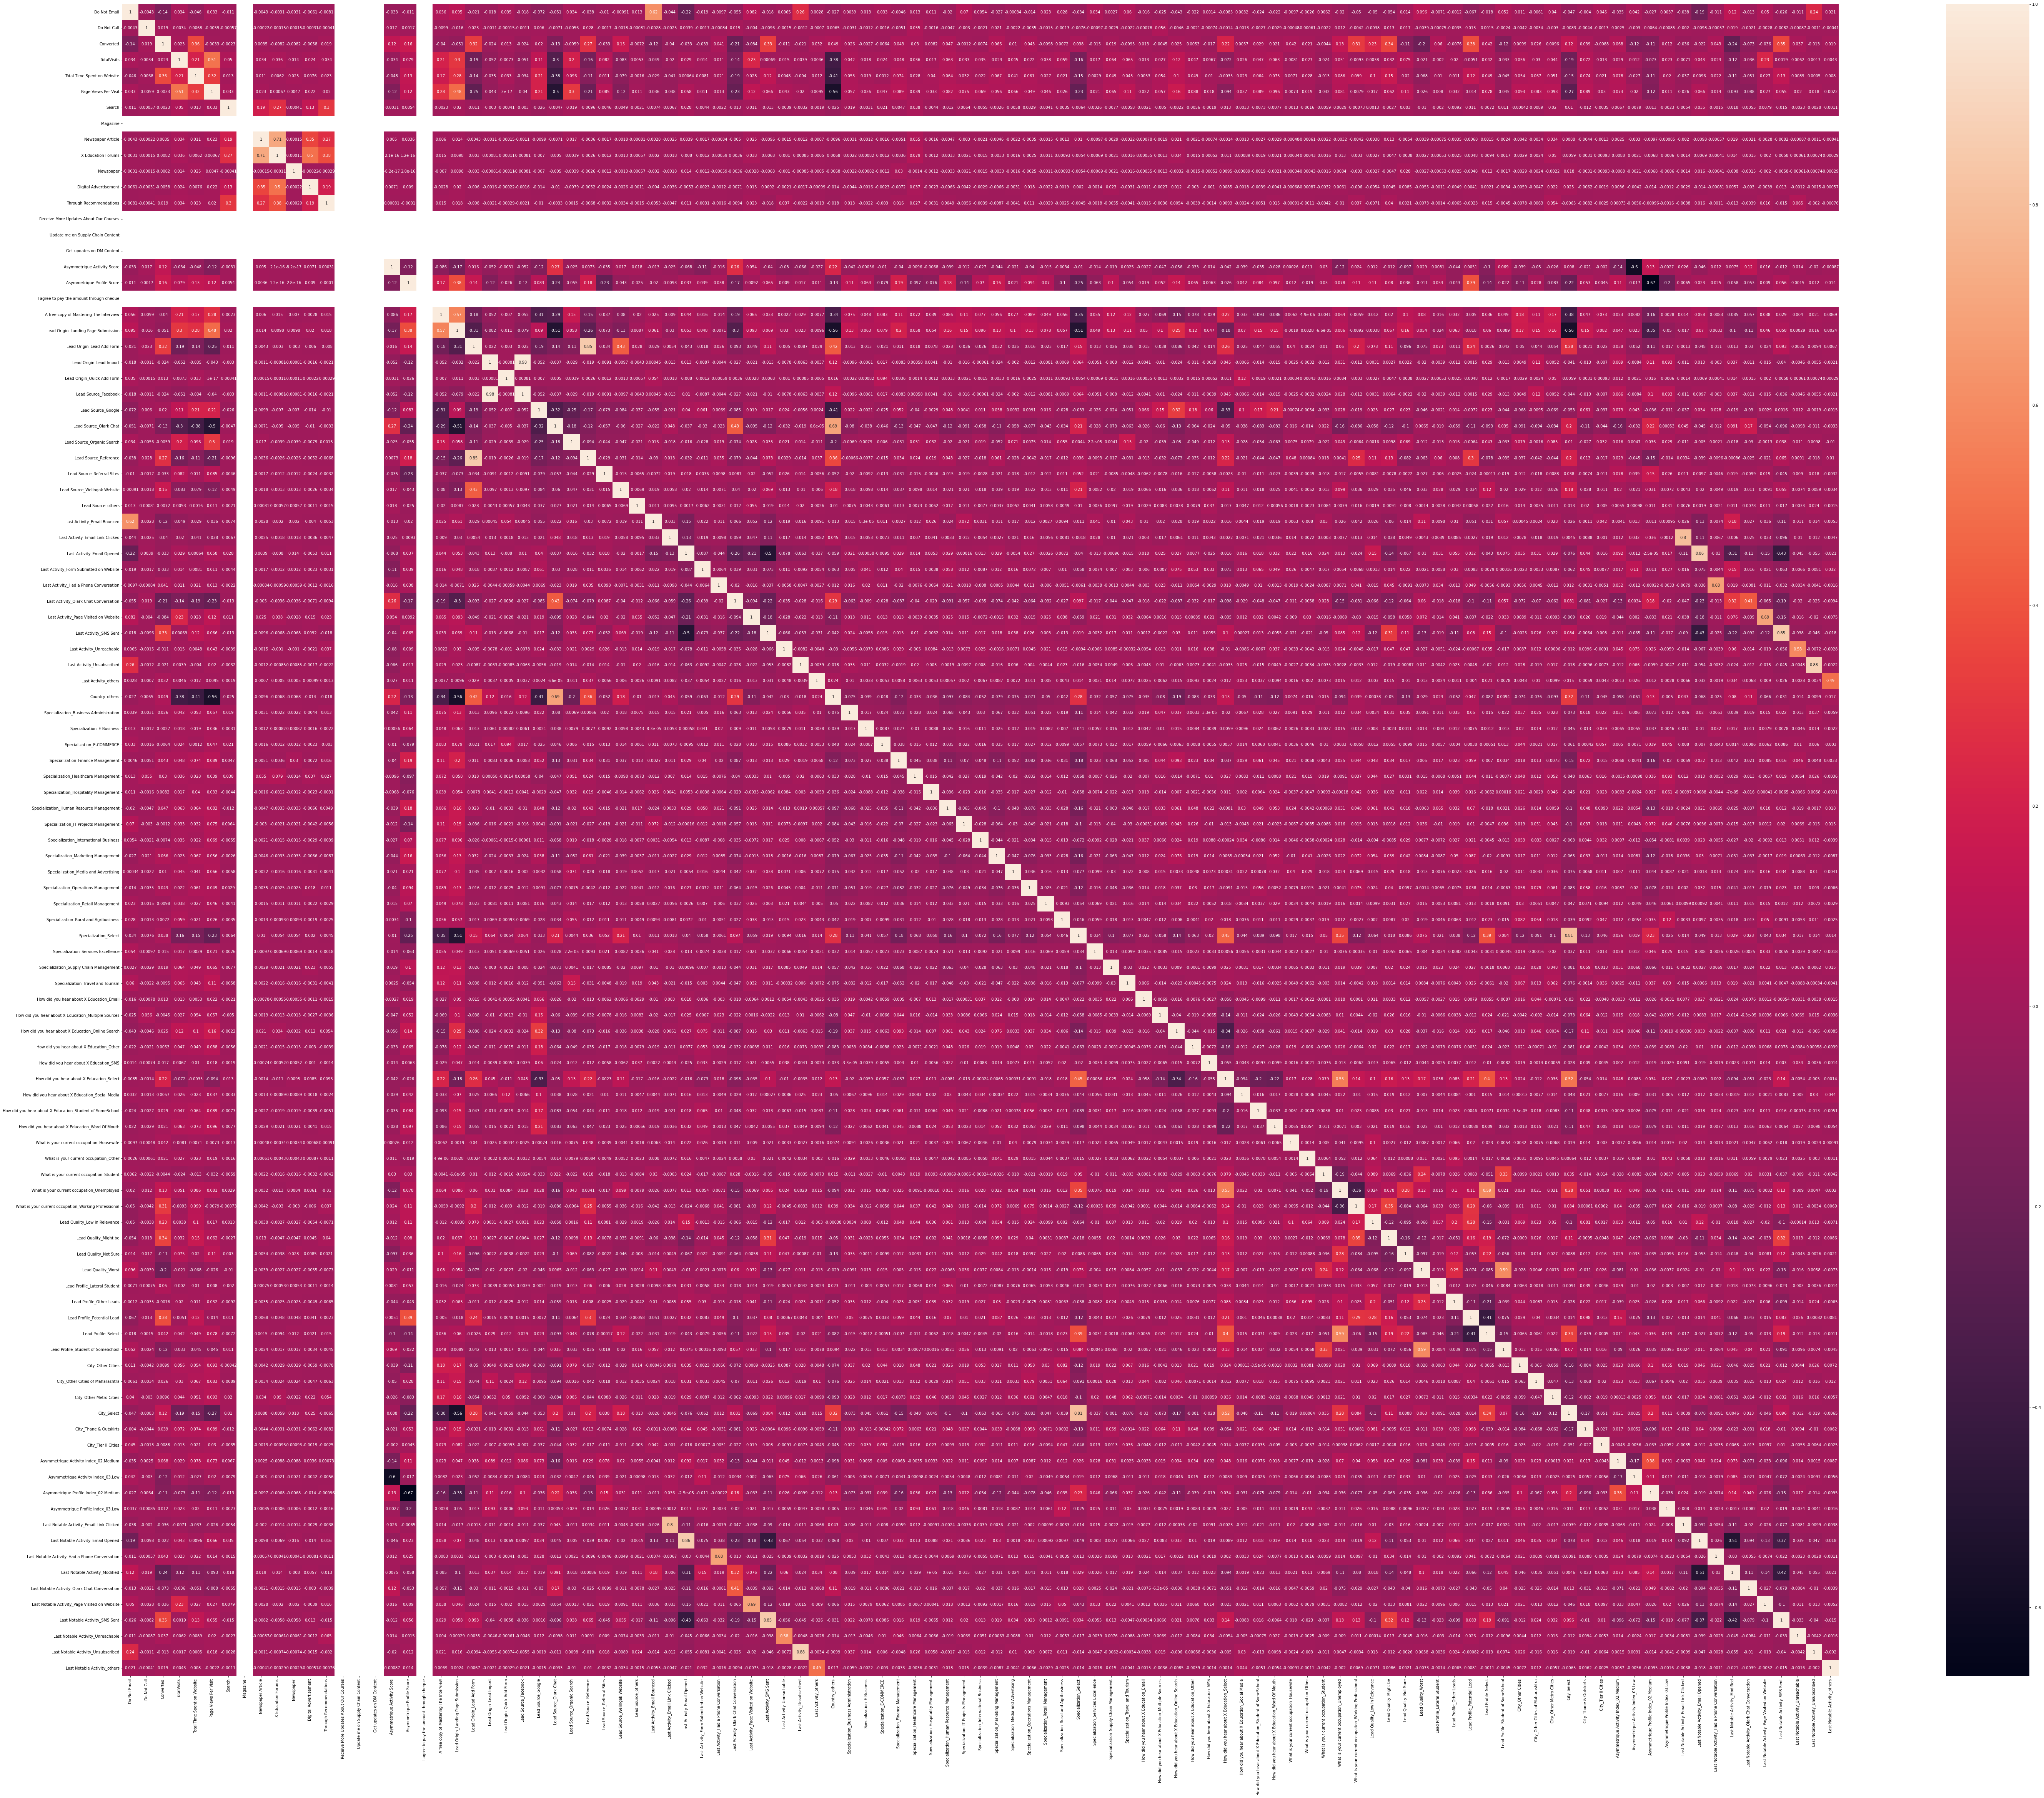

In [127]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,80))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [128]:
X_test = X_test.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
,'I agree to pay the amount through cheque','Magazine'], 1)
X_train = X_train.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
,'I agree to pay the amount through cheque','Magazine'], 1)

In [129]:
X_test = X_test.drop(['Tags'], 1)
X_train = X_train.drop(['Tags'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

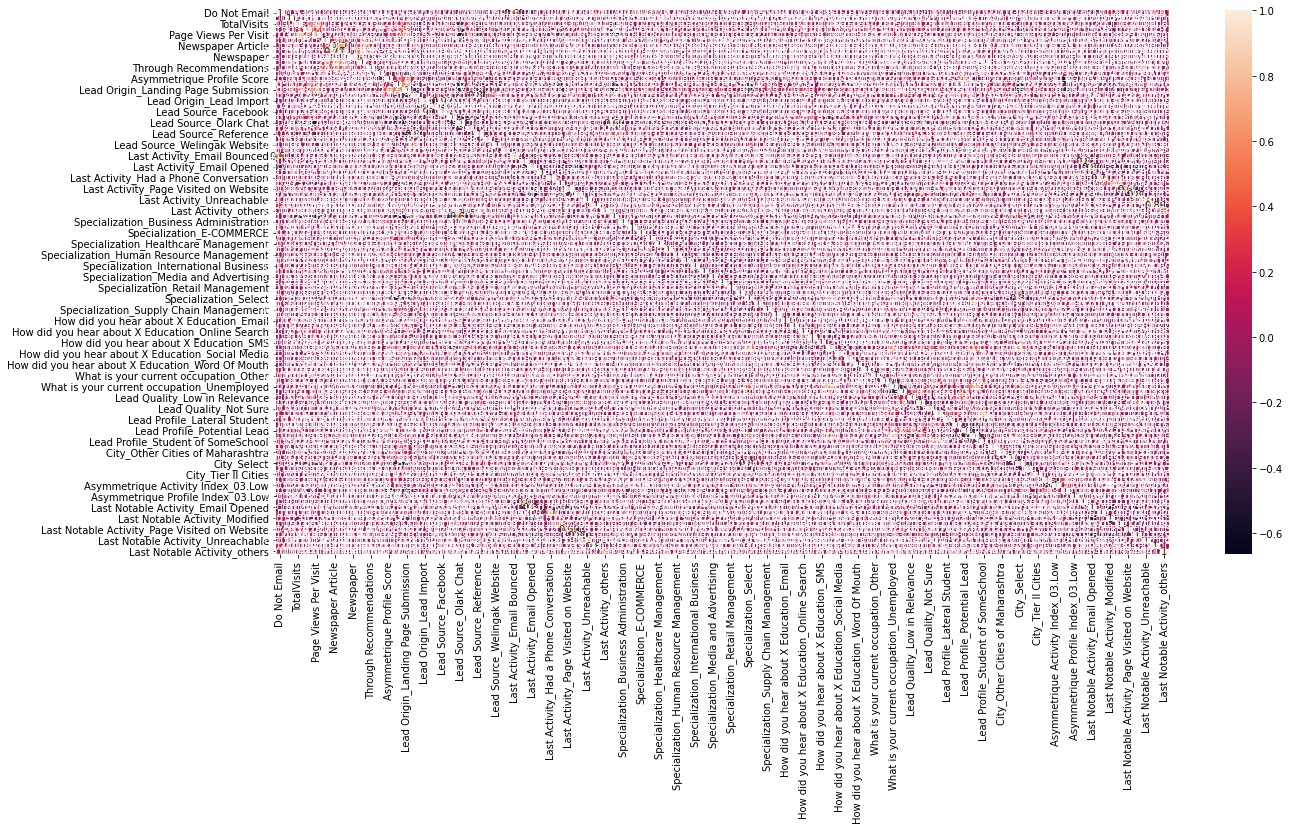

In [130]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [132]:
import statsmodels.api as sm

In [133]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())


In [134]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                           99
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.4
Date:                Sun, 26 Feb 2023   Deviance:                       4150.7
Time:                        01:05:04   Pearson chi2:                 7.33e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4972
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -2.2953      0.722     -3.178      0.001      -3.711      -0.880
Do Not Email                                                -0.9569      0.248     -3.862      0.000      -1.442      -0.471
Do Not Call                                                 22.6397   5.19e+04      0.000      1.000   -1.02e+05    1.02e+05
TotalVisits                                                  0.0209      0.007      2.873      0.004       0.007       0.035
Total Time Spent on Website                                  1.0998      0.047     23.644      0.000       1.009       1.191
Page Views Per Visit                                        -0.1843      0.060     -3.080      0.002      -0.302      -0.067
Search                                                       0.4354      0.883      0.493      0.622      -1.295       2.166
Newspaper Article                                           22.5542   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                         -22.5788   1.24e+05     -0.000      1.000   -2.42e+05    2.42e+05
Newspaper                                                  -23.9029   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                      -23.3495   5.15e+04     -0.000      1.000   -1.01e+05    1.01e+05
Through Recommendations                                      1.3902      1.717      0.810      0.418      -1.975       4.755
Asymmetrique Activity Score                                  1.0551      0.075     14.034      0.000       0.908       1.202
Asymmetrique Profile Score                                  -0.4808      0.100     -4.825      0.000      -0.676      -0.285
A free copy of Mastering The Interview                       0.2489      0.157      1.590      0.112      -0.058       0.556
Lead Origin_Landing Page Submission                         -0.6463      0.196     -3.295      0.001      -1.031      -0.262
Lead Origin_Lead Add Form                                    2.2520      0.598      3.766      0.000       1.080       3.424
Lead Origin_Lead Import                                      1.9738      1.754      1.125      0.260      -1.464       5.412
Lead Origin_Quick Add Form                                  21.8887   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                        -1.7605      1.757     -1.002      0.316      -5.203       1.682
Lead Source_Google                                           0.1600      0.144      1.115      0.265      -0.121       0.441
Lead Source_Olark Chat                                       0.6950      0.247     

### Step 8: Feature Selection Using RFE

In [136]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [138]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [139]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True])

In [140]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 3),
 ('Newspaper Article', False, 5),
 ('X Education Forums', False, 5),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 3),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 3),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Origin_Quick Add Form', False, 4),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 5),
 ('Last Activi

In [141]:
col = X_train.columns[rfe.support_]

In [142]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_others',
       'Last Activity_Email Bounced', 'Last Activity_Page Visited on Website',
       'Country_others', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management', 'S

##### Assessing the model with StatsModels

In [143]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2121.5
Date:                Sun, 26 Feb 2023   Deviance:                       4243.1
Time:                        01:13:26   Pearson chi2:                 6.90e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4900
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0167      0.192    -10.481      0.000      -2.394      -1.640
Do Not Email                                            -0.9434      0.202     -4.660      0.000      -1.340      -0.547
Do Not Call                                             22.6834   5.23e+04      0.000      1.000   -1.03e+05    1.03e+05
Total Time Spent on Website                              1.0945      0.045     24.176      0.000       1.006       1.183
Newspaper                                              -23.5850   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                  -22.6955   4.07e+04     -0.001      1.000   -7.98e+04    7.98e+04
Asymmetrique Activity Score                              0.8936      0.067     13.284      0.000       0.762       1.025
Lead Origin_Landing Page Submission                     -0.6533      0.116     -5.613      0.000      -0.881      -0.425
Lead Origin_Lead Add Form                                2.2088      0.222      9.956      0.000       1.774       2.644
Lead Source_Olark Chat                                   0.7153      0.137      5.213      0.000       0.446       0.984
Lead Source_Welingak Website                             2.9663      0.761      3.899      0.000       1.475       4.457
Last Activity_Email Link Clicked                         1.0899      0.457      2.386      0.017       0.194       1.985
Last Activity_Email Opened                               1.0902      0.204      5.357      0.000       0.691       1.489
Last Activity_Form Submitted on Website                  1.1071      0.404      2.739      0.006       0.315       1.899
Last Activity_Had a Phone Conversation                   1.5039      0.977      1.539      0.124      -0.411       3.419
Last Activity_Olark Chat Conversation                   -0.7673      0.251     -3.055      0.002      -1.260      -0.275
Last Activity_SMS Sent                                   1.7085      0.155     11.012      0.000       1.404       2.013
Last Activity_Unreachable                                0.6512      0.756      0.862      0.389      -0.830       2.132
Last Activity_Unsubscribed                               1.0478      0.559      1.875      0.061      -0.048       2.143
Last Activity_others                                     2.3207      0.827      2.806      0.005       0.700       3.942
Specialization_E-COMMERCE                                0.5732      0.329      1.743      0.081      -0.071       1.218
Specialization_Hospitality Management                   -0.7218      0.377     -1.917      0.055      -1.460       0.016
Specialization_IT Projects Management                    0

In [144]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.143469
6795    0.183121
3516    0.291173
8105    0.848084
3934    0.212434
4844    0.996427
3297    0.059015
8071    0.988730
987     0.167231
7423    0.986113
dtype: float64

In [145]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14346922, 0.18312089, 0.29117266, 0.84808389, 0.21243442,
       0.99642669, 0.05901454, 0.98873018, 0.16723077, 0.98611279])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [146]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob
0          0        0.143469
1          0        0.183121
2          0        0.291173
3          0        0.848084
4          0        0.212434

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [147]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  predicted
0          0        0.143469          0
1          0        0.183121          0
2          0        0.291173          0
3          0        0.848084          1
4          0        0.212434          0

In [148]:
from sklearn import metrics

In [149]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3620  382]
 [ 531 1935]]


In [53]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [150]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.858843537414966


#### Checking VIFs

In [151]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                         Last Activity_Email Opened  8.65
43                 Last Notable Activity_Email Opened  8.48
29         What is your current occupation_Unemployed  4.26
6                 Lead Origin_Landing Page Submission  3.94
45                     Last Notable Activity_Modified  3.27
38              Asymmetrique Activity Index_02.Medium  3.25
10                   Last Activity_Email Link Clicked  3.12
42           Last Notable Activity_Email Link Clicked  3.05
40               Asymmetrique Profile Index_02.Medium  2.97
15                             Last Activity_SMS Sent  2.57
5                         Asymmetrique Activity Score  2.43
39                 Asymmetrique Activity Index_03.Low  2.40
14              Last Activity_Olark Chat Conversation  2.34
8                              Lead Source_Olark Chat  2.28
13             Last Activity_Had a Phone Conversation  2.06
44     Last Notable Activity_Had a Phone Conversation  2.03
7                           Lead Origin_Lead Add Form  2.01
32                              Lead Quality_Might be  1.94
30  What is your current occupation_Working Profes...  1.93
37                        Lead Profile_Potential Lead  1.76
16                          Last Activity_Unreachable  1.70
47                  Last Notable Activity_Unreachable  1.63
33                              Lead Quality_Not Sure  1.57
34                                 Lead Quality_Worst  1.49
31                      Lead Quality_Low in Relevance  1.47
46      Last Notable Activity_Olark Chat Conversation  1.39
36                           Lead Profile_Other Leads  1.31
2                         Total Time Spent on Website  1.31
0                                        Do Not Email  1.30
9                        Lead Source_Welingak Website  1.29
28            What is your current occupation_Student  1.25
18                               Last Activity_others  1.19
48                       Last Notable Activity_others  1.18
21              Specialization_IT Projects Management  1.12
12            Last Activity_Form Submitted on Website  1.12
17                         Last Activity_Unsubscribed  1.09
41                  Asymmetrique Profile Index_03.Low  1.06
22              Specialization_Rural and Agribusiness  1.05
19                          Specialization_E-COMMERCE  1.05
26          What is your current occupation_Housewife  1.04
20              Specialization_Hospitality Management  1.04
35                       Lead Profile_Lateral Student  1.03
27              What is your current occupation_Other  1.02
25    How did you hear about X Education_Social Media  1.02
1                                         Do Not Call  1.01
23           How did you hear about X Education_Email  1.01
24             How did you hear about X Education_SMS  1.01
4                               Digital Advertisement  1.00
3                                           Newspaper  1.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [153]:
col = col.drop(['Last Activity_Email Opened','Last Notable Activity_Email Opened'], 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Digital Advertisement', 'Asymmetrique Activity Score',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_others', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'What is your current occupation_Housewife',
       'What is you

In [154]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2135.8
Date:                Sun, 26 Feb 2023   Deviance:                       4271.6
Time:                        01:17:18   Pearson chi2:                 7.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7928      0.132    -13.540      0.000      -2.052      -1.533
Do Not Email                                            -1.1039      0.194     -5.703      0.000      -1.483      -0.725
Do Not Call                                             23.1979   5.05e+04      0.000      1.000   -9.89e+04     9.9e+04
Total Time Spent on Website                              1.0878      0.045     24.159      0.000       1.000       1.176
Newspaper                                              -23.5825   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                  -22.6959   4.14e+04     -0.001      1.000   -8.12e+04    8.12e+04
Asymmetrique Activity Score                              0.8611      0.066     13.010      0.000       0.731       0.991
Lead Origin_Landing Page Submission                     -0.6405      0.116     -5.535      0.000      -0.867      -0.414
Lead Origin_Lead Add Form                                2.1905      0.221      9.897      0.000       1.757       2.624
Lead Source_Olark Chat                                   0.7783      0.137      5.693      0.000       0.510       1.046
Lead Source_Welingak Website                             2.9267      0.758      3.861      0.000       1.441       4.412
Last Activity_Email Link Clicked                         0.6234      0.444      1.404      0.160      -0.247       1.494
Last Activity_Form Submitted on Website                  0.6597      0.392      1.684      0.092      -0.108       1.428
Last Activity_Had a Phone Conversation                   1.0453      0.972      1.076      0.282      -0.859       2.950
Last Activity_Olark Chat Conversation                   -1.2085      0.232     -5.210      0.000      -1.663      -0.754
Last Activity_SMS Sent                                   1.4320      0.092     15.649      0.000       1.253       1.611
Last Activity_Unreachable                                0.2142      0.749      0.286      0.775      -1.254       1.682
Last Activity_Unsubscribed                               0.9295      0.551      1.688      0.091      -0.150       2.009
Last Activity_others                                     1.8536      0.817      2.269      0.023       0.253       3.455
Specialization_E-COMMERCE                                0.4914      0.325      1.510      0.131      -0.146       1.129
Specialization_Hospitality Management                   -0.7106      0.370     -1.922      0.055      -1.435       0.014
Specialization_IT Projects Management                    0.4569      0.215      2.121      0.034       0.035       0.879
Specialization_Rural and Agribusiness                    0

In [274]:
col = col.drop(['Newspaper','Digital Advertisement','Do Not Call','Digital Advertisement','What is your current occupation_Housewife'], 1)
col


Index(['Do Not Email', 'Total Time Spent on Website',
       'Asymmetrique Activity Score', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_others', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occu

In [275]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2144.5
Date:                Sun, 26 Feb 2023   Deviance:                       4289.0
Time:                        23:15:15   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4864
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7680      0.132    -13.419      0.000      -2.026      -1.510
Do Not Email                                            -1.1058      0.194     -5.710      0.000      -1.485      -0.726
Total Time Spent on Website                              1.0864      0.045     24.192      0.000       0.998       1.174
Asymmetrique Activity Score                              0.8539      0.066     12.962      0.000       0.725       0.983
Lead Origin_Landing Page Submission                     -0.6378      0.115     -5.523      0.000      -0.864      -0.411
Lead Origin_Lead Add Form                                2.2286      0.221     10.099      0.000       1.796       2.661
Lead Source_Olark Chat                                   0.7722      0.137      5.655      0.000       0.505       1.040
Lead Source_Welingak Website                             2.9059      0.758      3.834      0.000       1.420       4.392
Last Activity_Email Link Clicked                         0.6166      0.444      1.389      0.165      -0.254       1.487
Last Activity_Form Submitted on Website                  0.7346      0.382      1.924      0.054      -0.014       1.483
Last Activity_Had a Phone Conversation                   1.0326      0.969      1.065      0.287      -0.867       2.932
Last Activity_Olark Chat Conversation                   -1.2087      0.231     -5.229      0.000      -1.662      -0.756
Last Activity_SMS Sent                                   1.4225      0.091     15.593      0.000       1.244       1.601
Last Activity_Unreachable                                0.2072      0.749      0.277      0.782      -1.260       1.675
Last Activity_Unsubscribed                               0.9201      0.552      1.667      0.096      -0.162       2.002
Last Activity_others                                     1.8571      0.816      2.276      0.023       0.258       3.456
Specialization_E-COMMERCE                                0.4906      0.325      1.508      0.131      -0.147       1.128
Specialization_Hospitality Management                   -0.7264      0.371     -1.960      0.050      -1.453      -0.000
Specialization_IT Projects Management                    0.4492      0.215      2.086      0.037       0.027       0.871
Specialization_Rural and Agribusiness                    0.6230      0.462      1.349      0.177      -0.282       1.528
How did you hear about X Education_Email                 0.8666      0.624      1.388      0.165      -0.357       2.090
How did you hear about X Education_SMS                  -0.9412      0.985     -0.955      0.339      -2.873       0.990
How did you hear about X Education_Social Media          0

In [276]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [277]:
y_train_pred[:10]

array([0.14891126, 0.18263163, 0.30027307, 0.84646139, 0.12832661,
       0.99629936, 0.05750658, 0.98828694, 0.23231333, 0.98597596])

In [278]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [281]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.148911          0    1    1    0    0    0    0    0   
1          0        0.182632          0    1    1    0    0    0    0    0   
2          0        0.300273          0    1    1    1    1    0    0    0   
3          0        0.846461          1    1    1    1    1    1    1    1   
4          0        0.128327          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    1    1    0                1  
4    0    0    0                0

In [282]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8582251082251082


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [283]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
24         What is your current occupation_Unemployed  3.86
33              Asymmetrique Activity Index_02.Medium  3.21
7                    Last Activity_Email Link Clicked  3.03
37           Last Notable Activity_Email Link Clicked  2.99
3                 Lead Origin_Landing Page Submission  2.89
35               Asymmetrique Profile Index_02.Medium  2.82
2                         Asymmetrique Activity Score  2.41
34                 Asymmetrique Activity Index_03.Low  2.39
39                     Last Notable Activity_Modified  2.15
10              Last Activity_Olark Chat Conversation  2.08
9              Last Activity_Had a Phone Conversation  2.05
38     Last Notable Activity_Had a Phone Conversation  2.03
27                              Lead Quality_Might be  1.92
5                              Lead Source_Olark Chat  1.90
4                           Lead Origin_Lead Add Form  1.90
25  What is your current occupation_Working Profes...  1.87
11                             Last Activity_SMS Sent  1.78
32                        Lead Profile_Potential Lead  1.76
12                          Last Activity_Unreachable  1.67
41                  Last Notable Activity_Unreachable  1.62
28                              Lead Quality_Not Sure  1.56
29                                 Lead Quality_Worst  1.49
26                      Lead Quality_Low in Relevance  1.45
40      Last Notable Activity_Olark Chat Conversation  1.33
1                         Total Time Spent on Website  1.31
31                           Lead Profile_Other Leads  1.30
6                        Lead Source_Welingak Website  1.29
0                                        Do Not Email  1.24
23            What is your current occupation_Student  1.23
42                       Last Notable Activity_others  1.18
14                               Last Activity_others  1.18
17              Specialization_IT Projects Management  1.11
13                         Last Activity_Unsubscribed  1.08
8             Last Activity_Form Submitted on Website  1.08
36                  Asymmetrique Profile Index_03.Low  1.06
15                          Specialization_E-COMMERCE  1.05
18              Specialization_Rural and Agribusiness  1.04
16              Specialization_Hospitality Management  1.04
30                       Lead Profile_Lateral Student  1.03
22              What is your current occupation_Other  1.02
21    How did you hear about X Education_Social Media  1.02
20             How did you hear about X Education_SMS  1.01
19           How did you hear about X Education_Email  1.01

In [285]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8582251082251082


The accuracy is still practically the same.

## Metrics beyond simply accuracy

In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7846715328467153

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.9045477261369316

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09545227386306847


In [168]:
# positive predictive value 
print (TP / float(TP+FP))

0.8351316357358654


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8720790171043122


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

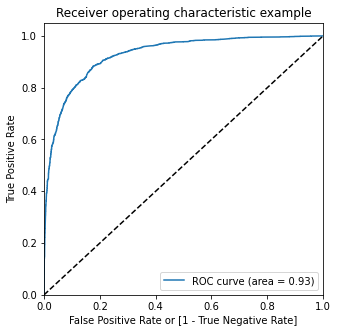

In [173]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [174]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.149846          0    1    1    0    0    0    0    0   
1          0        0.184656          0    1    1    0    0    0    0    0   
2          0        0.304785          0    1    1    1    1    0    0    0   
3          0        0.845069          1    1    1    1    1    1    1    1   
4          0        0.130926          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.727118  0.970803  0.576962
0.2   0.2  0.814626  0.924980  0.746627
0.3   0.3  0.844001  0.884834  0.818841
0.4   0.4  0.849567  0.830900  0.861069
0.5   0.5  0.858534  0.783049  0.905047
0.6   0.6  0.851732  0.718978  0.933533
0.7   0.7  0.835962  0.643958  0.954273
0.8   0.8  0.816636  0.561233  0.974013
0.9   0.9  0.774273  0.426602  0.988506


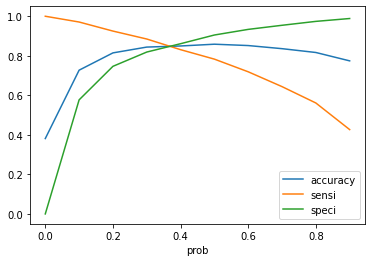

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [177]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.149846          0    1    1    0    0    0    0    0   
1          0        0.184656          0    1    1    0    0    0    0    0   
2          0        0.304785          0    1    1    1    1    0    0    0   
3          0        0.845069          1    1    1    1    1    1    1    1   
4          0        0.130926          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    1    1    0                1  
4    0    0    0                0

In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8440012368583797

In [179]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3277,  725],
       [ 284, 2182]])

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7846715328467153

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.9045477261369316

In [182]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09545227386306847


In [183]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8351316357358654


In [184]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8720790171043122


## Precision and Recall

In [97]:
#Looking at the confusion matrix again

In [185]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3622,  380],
       [ 535, 1931]])

##### Precision
TP / TP + FP

In [186]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8355690177412376

##### Recall
TP / TP + FN

In [187]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7830494728304948

Using sklearn utilities for the same

In [188]:
from sklearn.metrics import precision_score, recall_score

In [191]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8355690177412376

In [192]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7830494728304948

### Precision and recall tradeoff

In [193]:
from sklearn.metrics import precision_recall_curve

In [195]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [196]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

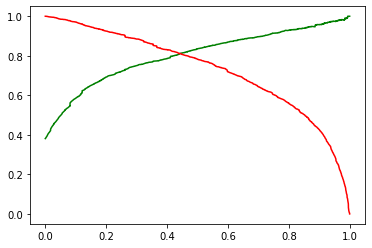

In [197]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [203]:
X_test[['Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])


In [204]:
X_test = X_test[col]
X_test.head()

Do Not Email  Do Not Call  Total Time Spent on Website  Newspaper  \
4269             0            0                     0.964504          0   
2376             0            0                    -0.885371          0   
7766             0            0                    -0.777416          0   
9199             0            0                    -0.885371          0   
4359             0            0                    -0.885371          0   

      Digital Advertisement  Asymmetrique Activity Score  \
4269                      0                    -0.005193   
2376                      0                     0.674956   
7766                      0                     1.655354   
9199                      0                     2.635752   
4359                      0                    -0.005193   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  ...  \
4269                       0                             0  ...   
2376                       0                             0  ...   
7766                       0                             0  ...   
9199                       1                             0  ...   
4359                       0                             0  ...   

      Asymmetrique Activity Index_02.Medium  \
4269                                      0   
2376                                      1   
7766                                      0   
9199                                      0   
4359                                      0   

      Asymmetrique Activity Index_03.Low  \
4269                                   0   
2376                                   0   
7766                                   0   
9199                                   0   
4359                                   0   

      Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
4269                                     0                                  0   
2376                                     0                                  0   
7766                                     1                                  0   
9199                                     1                                  0   
4359                                     0                                  0   

      Last Notable Activity_Email Link Clicked  \
4269                                         0   
2376                                         0   
7766                                         0   
9199                                         0   
4359                                         0   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Unreachable  Last Notable Activity_others  
4269                                  0  

In [205]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [235]:
y_test_pred = res.predict(X_test_sm)

In [207]:
y_test_pred[:10]

4269    0.664606
2376    0.983373
7766    0.948911
9199    0.201600
4359    0.942628
9186    0.843130
1631    0.955805
8963    0.557476
8007    0.034620
5324    0.330922
dtype: float64

In [237]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [238]:
# Let's see the head
y_pred_1.head()

0
4269  0.664606
2376  0.983373
7766  0.948911
9199  0.201600
4359  0.942628

In [239]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [241]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [242]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [243]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [234]:
y_pred_final.head()

Converted  CustID  Prospect ID         0
0          1    4269            0  0.664606
1          1    2376            1  0.983373
2          1    7766            2  0.948911
3          0    9199            3  0.201600
4          1    4359            4  0.942628

In [244]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [245]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          1         4269        0.664606
1          1         2376        0.983373
2          1         7766        0.948911
3          0         9199        0.201600
4          1         4359        0.942628

In [247]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [248]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob  final_predicted
0          1         4269        0.664606                1
1          1         2376        0.983373                1
2          1         7766        0.948911                1
3          0         9199        0.201600                0
4          1         4359        0.942628                1

In [252]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8546176046176046

In [253]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1492,  185],
       [ 218,  877]])

In [254]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [255]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009132420091324

In [256]:
# Let us calculate specificity
TN / float(TN+FP)

0.8896839594514013

#### SKLearn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
sklearn_model = logisticRegr.fit(X_train[col], y_train)


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train[col].columns,
    'Importance': sklearn_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
# Dropping from test dataset as well as we dropped these features from training dataset as well.
X_test = X_test.drop(['Digital Advertisement','Do Not Call','Newspaper','What is your current occupation_Housewife'],axis=1)

In [296]:
y_predi = sklearn_model.predict(X_test)

In [298]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi)

0.8589466089466089

#### 
     Accuracy Score is 85.46% using statsModel
     Accuracy Score is 85.89% using SKlearn
